# Memoria: Mobile Price Classification

#### Aquest Notebook presenta el preprocessing que s'ha fet en el dataset de Mobile Price Classification. També hem afegit petites explicacions sobre el nostre projecte.

Fem imports:

In [36]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

Veiem com es el dataset:

In [37]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Mirem si tenim NaNs al 'dataset':

In [38]:
nan_count = df.isnull().sum()
nan_percentage = df.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Porcentaje de NaNs por columna:
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64


Mirem quin tipus de dades estem tractant i a més observem en una gràfica el balanceig del nombre de dades:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

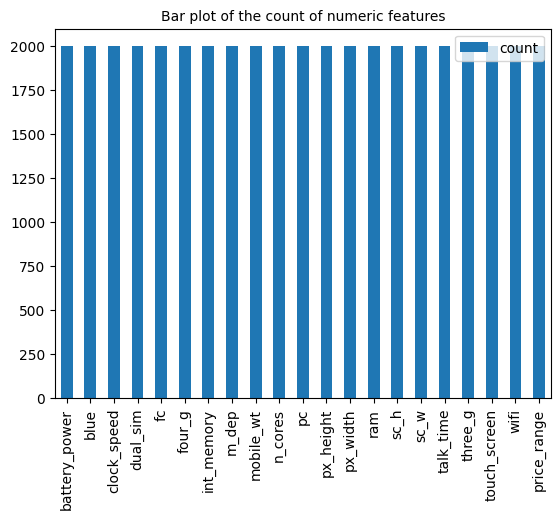

In [39]:
t=df.info()
d = df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=10)

Discretitzem les següents classes:

In [40]:
def discretize(df, columns):
    for column in columns:
        df[column] = pd.qcut(df[column], q=4, labels=False)
    return df

discretize(df, ['battery_power', 'clock_speed', 'fc', 'ram', 'talk_time', 'int_memory', 'm_dep', 'mobile_wt',
                    'pc', 'px_height', 'px_width', 'sc_h', 'sc_w'])

df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,0,2,0,0,0,0,2,3,2,...,0,0,2,0,2,3,0,0,1,1
1,1,1,0,1,0,1,3,2,1,3,...,2,3,2,3,1,1,1,1,0,2
2,0,1,0,1,1,1,2,3,2,5,...,3,3,2,1,0,1,1,1,0,2
3,0,1,3,0,0,0,0,2,1,6,...,3,3,2,2,2,1,1,0,0,2
4,3,1,1,0,3,1,2,2,1,2,...,3,1,1,0,0,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,0,1,0,1,0,2,0,6,...,3,3,0,2,1,3,1,1,0,0
1996,3,1,3,1,0,0,2,0,3,4,...,2,3,1,1,3,2,1,1,1,2
1997,3,0,1,1,0,1,2,2,0,8,...,2,2,2,0,0,0,1,1,0,3
1998,2,0,1,0,2,1,2,0,2,5,...,1,0,0,3,3,3,1,1,1,0


Mirem si estan balancejades per escollir la mètrica més adient:

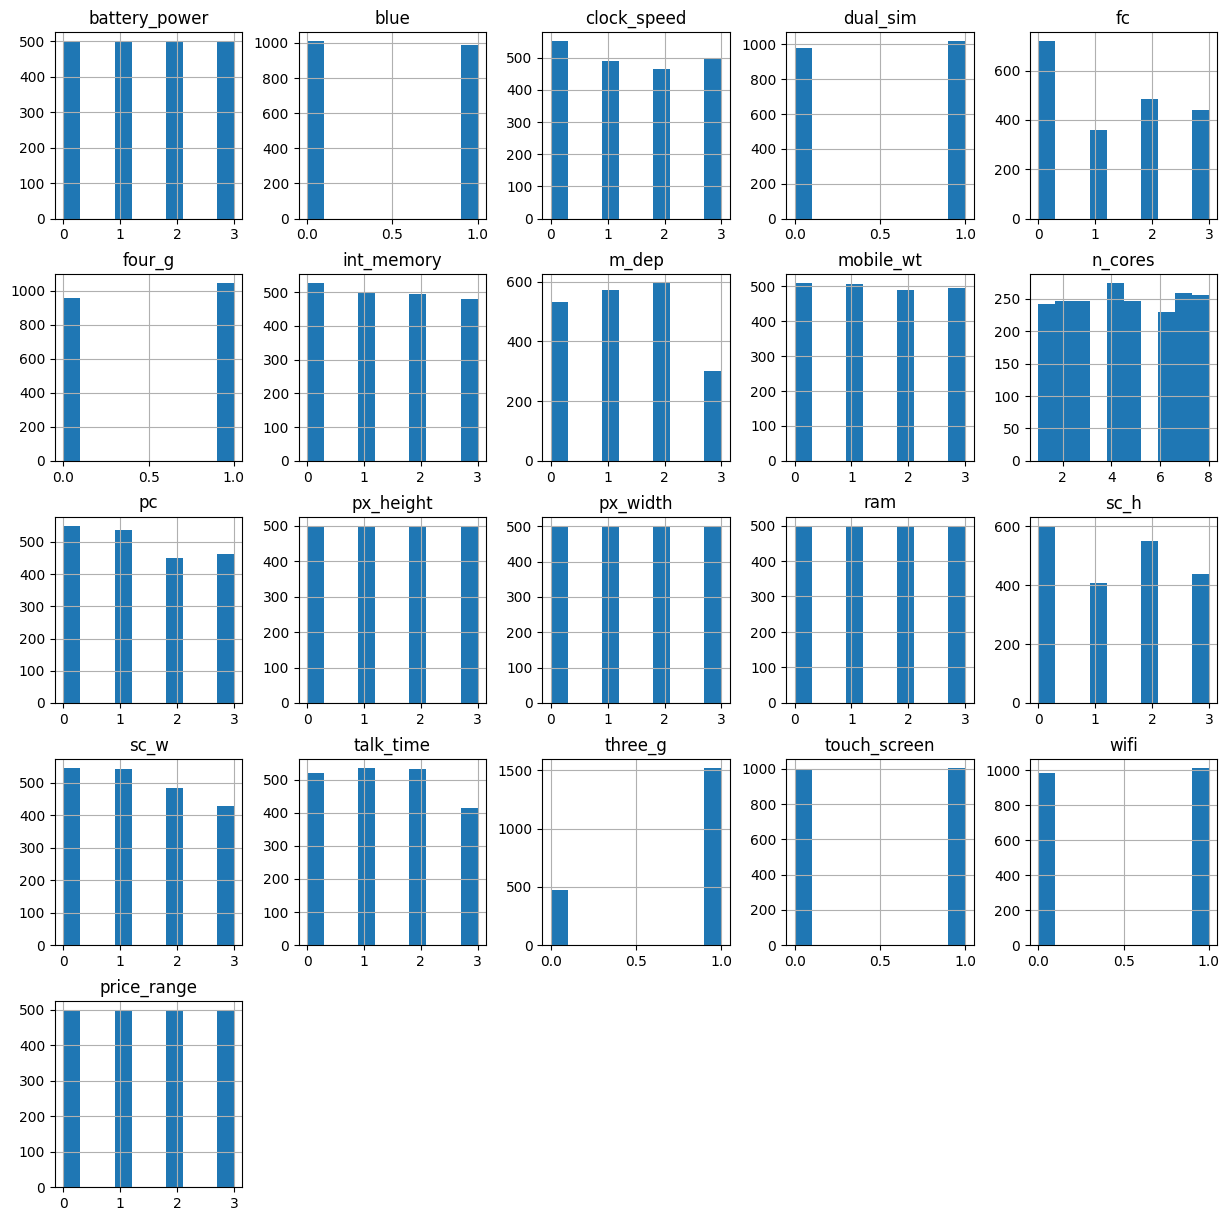

In [41]:
df.hist(figsize=(15,15))
plt.show()

----
# Annex: Aclaracions sobre el nostre codi fet al document DecisionTreeClassifier.py

## Difficultat B

### Analisis de les dades

Com hem vist abans, com que en el nostre dataset no teníem cap absència de valors, és a dir, cap instància del dataset tenia un NaN en alguna de les seves columnes. Donat que la part B es tracta de solventar un problema que no tenim en el nostre dataset, hem decidit incloure un altre que sí ho tingui.

Aquest es tracta d'un dataset que hem tractat en una altra assignatura, per la qual cosa ja estem familiaritzats amb les dades. Aquest és el dataset amb dades de l'incident del Titanic, on l'objectiu és predir si una persona sobreviuria a partir d'atributs com l'edat, la classe, els familiars, etc.

A continuació, farem una breu anàlisi del codi del Titanic per proporcionar els canvis que hem fet.


In [42]:
dft = pd.read_csv('train_titanic.csv')
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Com podem veure, tenim alguns atributs categòrics i d'altres per preprocessar. Anem a veure els NaNs, que és la raó principal per la qual hem triat aquest dataset per fer la dificultat B.

In [43]:
nan_count = dft.isnull().sum()
nan_percentage = dft.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Porcentaje de NaNs por columna:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


Com podem observar, tenim buits en columnes com l'edat, la cabina i l'embarcació. Tot i això, aplicarem l'imputer a les columnes esmentades en el preprocés.

## Preprocessing

Pel preprocés de les dades, hem creat una funció que ens ha solucionat la part dels atributs categòrics per utilitzar-la en el nostre model. On codificarem les columnes Cabin, SibSp, Sex i Embarked. I, com a extra pel preprocés, eliminarem les columnes que representen un identificador únic, com Id del Passatger, Nom i Tiquet.

In [44]:
def encode_titanic(train):
    # Initial encode
    train['hasCabin'] = train['Cabin'].notna()
    train['hasFamiliar'] = train['SibSp'] != 0
    # Drop unique values
    train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    train.dropna(inplace=True)
    # Get dummies of other encodable columns
    sex = pd.get_dummies(train['Sex'])
    embark = pd.get_dummies(train['Embarked'])
    train.drop(['Sex', 'Embarked'], axis=1, inplace=True)
    train = pd.concat([train, sex, embark], axis=1)
    return train

encode_titanic(dft)
dft.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin,hasFamiliar
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,True
2,1,3,26.0,0,0,7.9250,False,False
3,1,1,35.0,1,0,53.1000,True,True
4,0,3,35.0,0,0,8.0500,False,False


Ara, amb tot codificat, **aplicarem el Simple Imputer per tractar els valors que falten**.

In [45]:
imputer = SimpleImputer(strategy='mean')
dft = pd.DataFrame(imputer.fit_transform(dft), columns=dft.columns)

# Visualitzar NaNs
nan_count = dft.isnull().sum()
nan_percentage = dft.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)

Número de NaNs por columna:
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
hasCabin       0
hasFamiliar    0
dtype: int64

Porcentaje de NaNs por columna:
Survived       0.0
Pclass         0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
hasCabin       0.0
hasFamiliar    0.0
dtype: float64


Ara, com podem veure, tenim les dades gairebé preprocessades i hem eliminat de manera efectiva els valors absents d'un dataset que realment en tenia.

A part d'això, la resta del preprocés i de la validació creuada ha seguit el mateix recorregut que el nostre dataset original.

## LOOCV

En la part de validació creuada hem implementat el K-fold el qual és el que utilitzem per fer la validació del hiperparametre criterion, també hem implementat el de Leave-one-out cross-validation (LOOCV). 
El qual vam observar que no era adient pels nostres datasets (tant el proporcionat per l'enunciat com el del titanic per la dificultat B), ja que aquests tenen bastantes files (2000 pels mobils i 900 pel titanic).
 
Aixo provoca que el LOOCV a part de tardar considerablement més que el kfold, no dona resultats tant robustos. Aixo es deu a que el LOOCV és ideal per casos extrems on tenim molt poques dades, situació que no tenim en aquesta practica.

Tot i que no s'utilitza voliem mencionar que, com el k-fold, hem fet la seva implementació de forma manual. A sota es pot observar el codi utilitzat. 

In [46]:
from DecisionTreeClassifier import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def calculate_metrics(y_pred, y_test, average='weighted'):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, Recall, and F1 Score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=average)

    return accuracy, precision, recall, f1_score

def LOOCV_f1(estimator, X_train, y_train):
    f1_score_total = 0
    for i, X_val in enumerate(X_train):
        # Prepare data
        y_val = y_train[i]
        y_train_val = np.delete(y_train, i)
        X_train_val = np.delete(X_train, i, axis=0)
        # Train and predict
        estimator.fit(X_train_val, y_train_val)
        y_pred = estimator.predict([X_val])
        # Calculate metric
        _, _, _, f1 = calculate_metrics(y_pred, [y_val])
        f1_score_total += f1
    # Return Mean
    return f1_score_total / len(X_train)

# Acabem de preprocessar les nostres dades
# Separate target from predictors
X = np.array(df.drop('price_range', axis=1).copy())
y = np.array(df['price_range'].copy())
feature_names = list(df.columns)[:-1]  # Assuming the last column is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tipo = ['ID3', 'C45', 'Gini']

# LOOCV 
mean_loocv_f1 = []
for t in tipo:
    dtc = DecisionTreeClassifier(nombres_atributos=feature_names, criterion=t)
    # AVIS: DESCOMENTAR LA LINEA D'ABAIX ACTIVA EL LOOCV PERO ES MOLT SEGUR QUE TARDI BASTANT
    
    #mean_loocv_f1.append(LOOCV_f1(dtc, X_train, y_train))
print(mean_loocv_f1)

[]


## Representacions Arbres

També hem fet que es pugui representar l'arbre resultant utilitzant la llibreria graphviz, amb la qual construim un arbre dins de la llibreria a partir del nostre arbre generat i la sortida d'aquest passa a ser una imatge amb l'arbre de decisió entrenat. D'altra banda també hem implementat un format en text on imprimeix l'arbre en un format d'identació. Aquestes son les funcions internes dins del DecisionTreeClassifier que ho fan possible.



```py
# DecisionTreeClassifier.print_tree()


def print_tree_graph(self, output_file_path='output_graph'):
    graph = graphviz.Digraph(format='png', engine='dot')
    self.build_graph(graph)
    # Save the graph to a file
    graph.render(output_file_path, format='png', cleanup=True)

def build_graph(self, graph, nodo=None, path=""):
    if not nodo:
        nodo = self.nodo
        path = nodo.value
        graph.node(path)

    # Comprovar que l'arbre no esta buit
    if nodo.childs:
        for child in nodo.childs:
            if child.next.childs:
                # Crida recursiva
                graph.node(path+child.next.value, label=nodo.value+"="f'{child.value}'+"\n"+child.next.value)
                graph.edge(path, path+child.next.value)
                self.build_graph(graph, child.next, path+child.next.value)
            else:
                # Cas fulla
                graph.node(path+f'{child.value}'+f'{child.next.value}', label=nodo.value+"="f'{child.value}'+"\n"+f'{child.value}')
                graph.edge(path, path+f'{child.value}'+f'{child.next.value}')
```

Per exemple aqui tenim els arbres resultats pel mobil i el titanic.

<img src="mobile_dataset_ID3.png" alt="Arbre mobil" width="2000"/>

I per imprimir en format de text identat:

```py
# DecisionTreeClassifier.print_tree_graph()

def print_tree(self, nodo=None, nivel=0):
    if not nodo:
        nodo = self.nodo

    indent = ' ' * nivel * 4
    print(f'{indent}{nodo.value}')

    if nodo.childs:
        for child in nodo.childs:
            print(f'{indent}({child.value})')
            self.print_tree(child.next, nivel + 1)
    elif nodo.next:
        print(f'{indent}{nodo.next}')
```

I aquest seria l'arbre anterior del ID3 amb format text identat

In [47]:
def print_text_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            print(content)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
file_path = 'ID3-tree.txt'
print_text_file(file_path)

ram
(0.0)
    px_width
    (0.0)
        int_memory
        (0.0)
            0.0
        (1.0)
            n_cores
            (1.0)
                0.0
            (2.0)
                0.0
            (3.0)
                0.0
            (4.0)
                0.0
            (5.0)
                clock_speed
                (0.0)
                    0.0
                (2.0)
                    1.0
            (6.0)
                0.0
            (7.0)
                0.0
            (8.0)
                battery_power
                (1.0)
                    0.0
                (3.0)
                    1.0
        (2.0)
            0.0
        (3.0)
            0.0
    (1.0)
        mobile_wt
        (0.0)
            three_g
            (0.0)
                fc
                (0.0)
                    0.0
                (1.0)
                    0.0
                (2.0)
                    0.0
                (3.0)
                    1.0
            (1.0)
                0

## Part A

Per tal de portar a terme el tractament dels atributs continus, hem fet una funció partició binaria. Aquesta funció, fa el metode que hem vist a classe per tractar els atributs continus que consisteix en calcular un punt de partició que maximitzi el guany (ID3), guany ratio (C45) o gini (C45).

El procediment que hem seguit per portar-ho a terme comença analitzant, a l'hora de seleccionar la característica amb millor guany, si es tracta d'un atribut continu o no. Hem fet una condició simple que clasifica com a continus els atributs segons el seu tipus, si es tracta d'un int o un float, el considerem continu. Així doncs, pels atributs que verifiquin aquesta condició i per tant estiguin considerats continus, calcularem el guany a partir d'una funció que hem anomenat "partición_binaria".

Aquesta funció reprodueix la metodología explicada a clase, com hem mencionat anteriormente. Més detalladament, el que fem es ordenar en ordre ascendent els exemples i per cada parella calculem la mitja. Aquesta mitja esdevé el punt de particio, deixant els exemples amb valors inferiors d'una banda i els superiors d'altra banda, dividint així en dos subsets. Una vegada ho tenim dividit, calculem el guany corresponent d'una manera que li donem pes a cada subset, donant importancia a la quantitat d'exemples que continguin.

Finalment, comprovem si aquest guany calculat supera el guany màxim guardat, si el supera el guany màxim s'actualitza a aquest. Una vegada acaba el bucle, retornem aquell guany màxim que hem trobat.

In [48]:
def particion_binaria(self, X_train, id_atributo):
        # X: Atributo continuo
        # y: Etiquetas de clase

        # Ordenar los valores del atributo en orden ascendente

        indices_ordenados = np.argsort(X_train[id_atributo])
        X_ordenado = X_train[indices_ordenados, :]
        y_ordenado = X_ordenado[-1, :] #cogemos todas las filas de la ultima columna - target

        mejor_ganancia = 0
        mejor_punto_particion = None

        for i in range(1, len(y_ordenado)):
            # Calcular punto medio
            punto_medio = (X_ordenado[id_atributo][i - 1] + X_ordenado[id_atributo][i]) / 2

            # Particionar los datos
            izquierda = X_ordenado[:][X_ordenado <= punto_medio]
            derecha = X_ordenado[:][X_ordenado > punto_medio]

            # Calcular la ganancia
            if self.criterion == 'C45':  # C4.5 Entropy
                ganancia = self.calcular_ratio_ganancia(X_ordenado, id_atributo) - (
                        (len(izquierda) / len(y_ordenado)) * self.calcular_ratio_ganancia(izquierda, id_atributo) +
                        (len(derecha) / len(y_ordenado)) * self.calcular_ratio_ganancia(derecha, id_atributo)
                )
            elif self.criterion == 'Gini':  # C4.5 Gini
                ganancia = self.calcular_ganancia_gini(X_ordenado, id_atributo) - (
                        (len(izquierda) / len(y_ordenado)) * self.calcular_ganancia_gini(izquierda, id_atributo) +
                        (len(derecha) / len(y_ordenado)) * self.calcular_ganancia_gini(derecha, id_atributo))
            else:  # ID3_Entropy by default
                ganancia = self.calcular_ganancia_informacion(X_ordenado, id_atributo) - (
                        (len(izquierda) / len(y_ordenado)) * self.calcular_ganancia_informacion(izquierda, id_atributo) +
                        (len(derecha) / len(y_ordenado)) * self.calcular_ganancia_informacion(derecha, id_atributo))

            # Actualizar si encontramos una ganancia mejor
            if ganancia > mejor_ganancia:
                mejor_ganancia = ganancia
                mejor_punto_particion = punto_medio

        return mejor_ganancia #mejor_punto_particion no lo usamos

Hem pogut desenvolupar la funció, però hem tingut problemes per adaptar-la al codi i no ens acaba de funcionar bé. Tot i així, la hem deixat comentada, ja que ho hem intentat.